In [5]:
import matplotlib.pyplot as plt
import numpy as np
import scipy as scp
import sys
import os
from scipy.optimize import curve_fit

In [15]:
def fit_func(x,a,b,c,d):
    return a*np.exp(-b/x + c)+d

[1.50868212 0.23360498 1.28284982 0.18383282]
[1.53070985 0.26119617 1.29862699 0.20719172]


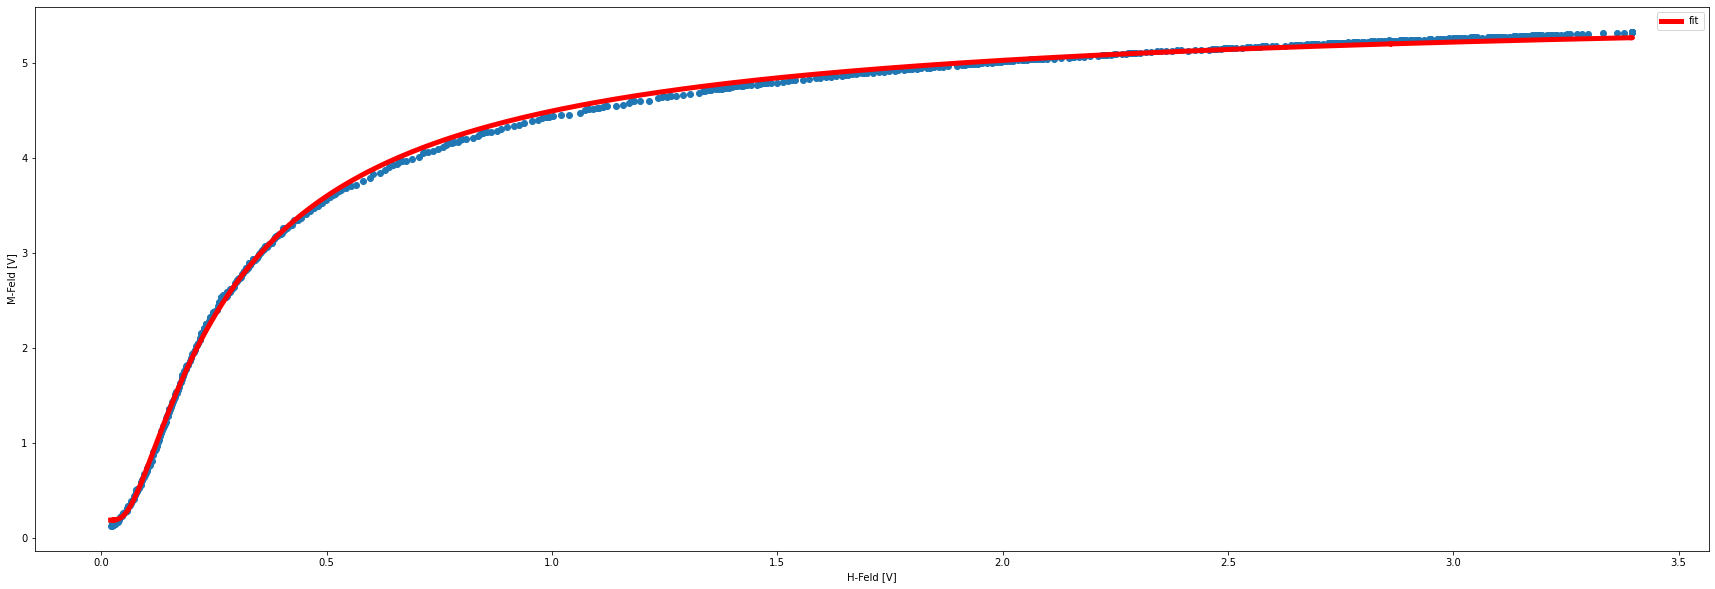

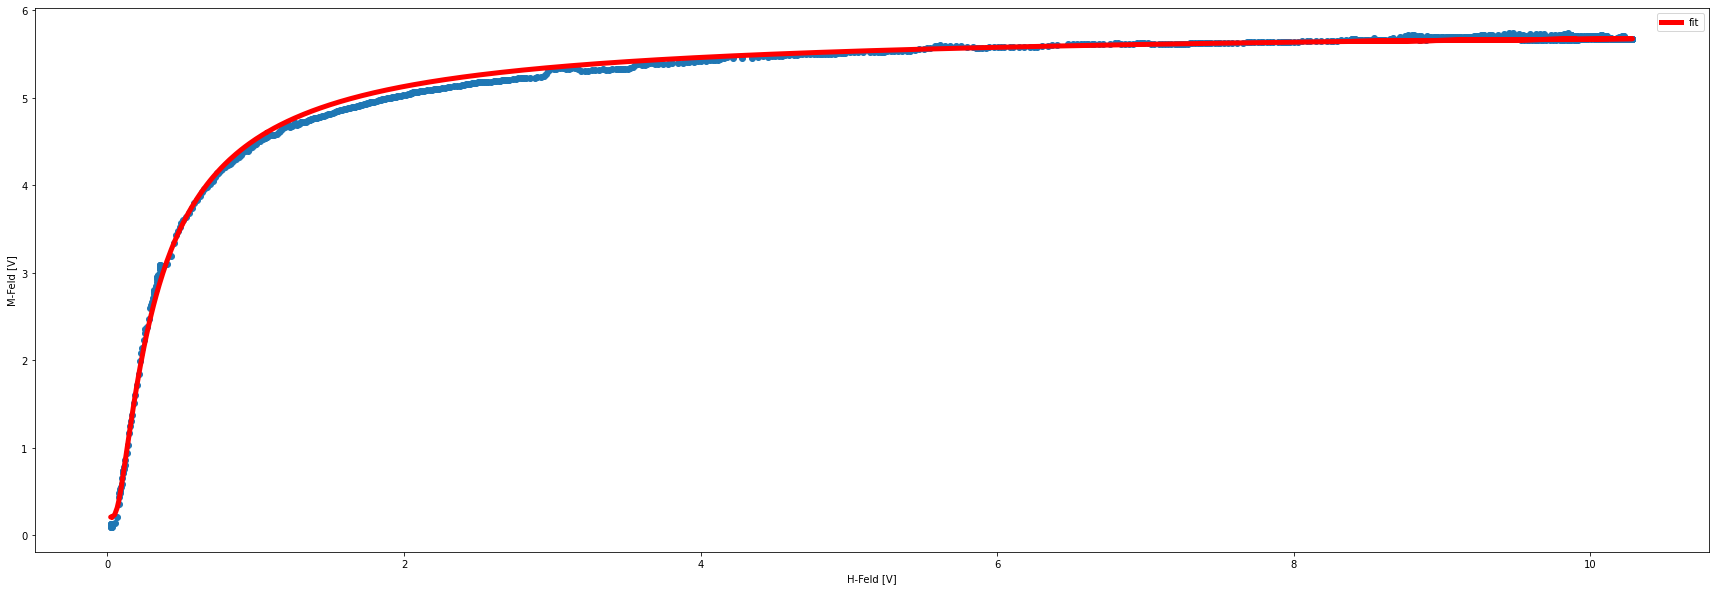

In [20]:
for name in os.listdir("Daten"):
    plt.figure(figsize=(30,10))
    file = open("Daten/"+name)
    lines = file.readlines()
    xv,yv = [],[]
    for line in lines:
        vals = line[:-1].split("\t")
        xv.append(float(vals[0]))
        yv.append(float(vals[1]))
    
    popt,_ = curve_fit(fit_func,xv,yv)
    print(popt)
    plt.plot(xv,[fit_func(x,*popt) for x in xv],color="red",label="fit",linewidth=5)
    plt.scatter(xv,yv)
    plt.xlabel("H-Feld [V]")
    plt.ylabel("M-Feld [V]")
    plt.legend()
    file.close()

c:\users\jesco\documents\installed programms\utility\python\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in log
  


(array([ 0.78885932,  3.49406819, -0.06411009,  3.02682874]),
 array([[ 6.79090061e-05,  8.60529517e+02, -1.57904977e+01,
         -1.95128007e+02],
        [ 8.60529634e+02,  2.47045433e+12, -4.53322423e+10,
         -5.60183391e+11],
        [-1.57904998e+01, -4.53322423e+10,  8.31835735e+08,
          1.02792304e+10],
        [-1.95128034e+02, -5.60183391e+11,  1.02792304e+10,
          1.27023369e+11]]))

['Teil 1 3V']